## <center>Image Classification Project</center>

Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 
The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust.

<b>This task is divided into two phases: Data Collection and Mode Building.</b>

#### Importing the required libraries:

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
img_size = [224, 224]

train_path = 'E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train'
valid_path = 'E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/test'

In [6]:
# useful for getting number of output classes
folders = glob('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train/*')

In [7]:
# checking for the image folders
folders

['E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train\\Jeans(Men)',
 'E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train\\Saree(Women)',
 'E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train\\Trouser(Men)']

In [8]:
len(folders)

3

#### 1. VGG16

In [4]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [9]:
# our layers
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 620 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/test',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 99 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Ajitesh\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
31/31 [==============================] - 297s 9s/step - loss: 0.3886 - accuracy: 0.8290 - val_loss: 0.1264 - val_accuracy: 0.9394
Epoch 2/20
31/31 [==============================] - 415s 14s/step - loss: 0.1092 - accuracy: 0.9613 - val_loss: 0.0658 - val_accuracy: 0.9798
Epoch 3/20
31/31 [==============================] - 503s 16s/step - loss: 0.0838 - accuracy: 0.9677 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 4/20
31/31 [==============================] - 422s 14s/step - loss: 0.0347 - accuracy: 0.9952 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 5/20
31/31 [==============================] - 576s 19s/step - loss: 0.0267 - accuracy: 0.9968 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 6/20
31/31 [==============================] - 633s 20s/step - loss: 0.0243 - accuracy: 0.9968 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7/20
31/31 [==============================] - 445s 15s/step - loss: 0.0230 - accuracy: 0.9968 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 8

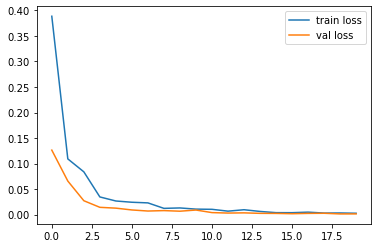

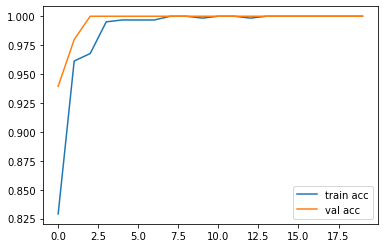

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### 2. ResNet50:

In [16]:
# Adding data-augmentation parameters to ImageDataGenerator

train_res = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, 
                               height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                               horizontal_flip = True)

test_res = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_res.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train',
                                                batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = test_res.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/test', 
                                                    batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

Found 620 images belonging to 3 classes.
Found 99 images belonging to 3 classes.


In [17]:
# Importing the base model
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [18]:
#We're using the basic ResNet model, so we will keep the layers frozen and only modify the last layer
for layer in base_model.layers:
    layer.trainable = False

In [19]:
#Build and Compile the Model

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(3, activation='sigmoid'))

In [20]:
# tell the model what cost and optimization method to use

base_model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
#Fitting the model
resnet_history = base_model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

C:\Users\Ajitesh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
31/31 [==============================] - 559s 17s/step - loss: 0.3902 - accuracy: 0.8581 - val_loss: 1.5974 - val_accuracy: 0.3333
Epoch 2/10
31/31 [==============================] - 529s 17s/step - loss: 1.7576 - accuracy: 0.7645 - val_loss: 4.5000 - val_accuracy: 0.3636
Epoch 3/10
31/31 [==============================] - 544s 18s/step - loss: 2.5507 - accuracy: 0.7226 - val_loss: 4.3851 - val_accuracy: 0.4141
Epoch 4/10
31/31 [==============================] - 517s 17s/step - loss: 1.0502 - accuracy: 0.8032 - val_loss: 1.9233 - val_accuracy: 0.4242
Epoch 5/10
31/31 [==============================] - 526s 17s/step - loss: 0.7828 - accuracy: 0.8306 - val_loss: 2.5447 - val_accuracy: 0.4141
Epoch 6/10
31/31 [==============================] - 570s 18s/step - loss: 0.4965 - accuracy: 0.8371 - val_loss: 1.2224 - val_accuracy: 0.4040
Epoch 7/10
31/31 [==============================] - 533s 17s/step - loss: 0.3563 - accuracy: 0.8645 - val_loss: 1.1480 - val_accuracy: 0.4747
Epoch 

#### 3. Inception:

In [25]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, 
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [36]:
# Creating train and test set

train_inception = train_datagen.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/train', 
                                               batch_size = 20, class_mode = 'categorical', target_size = (150, 150))

test_inception = test_datagen.flow_from_directory('E:/Flip Robo/Project - 8 - Image Scraping and Classification Project/Images data/test', 
                                             batch_size = 20, class_mode = 'categorical', target_size = (150, 150))

Found 620 images belonging to 3 classes.
Found 99 images belonging to 3 classes.


In [37]:
#loading the base model
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 34s 0us/step


In [38]:
#freeze the layers:
for layer in inception_model.layers:
    layer.trainable = False

In [42]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

x = layers.Flatten()(inception_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 3 node for classification output
x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(inception_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

C:\Users\Ajitesh\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [45]:
#fitting the model
inc_history = model.fit_generator(train_inception, validation_data = test_inception, 
                                  steps_per_epoch = len(train_inception), epochs = 10)

C:\Users\Ajitesh\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
31/31 [==============================] - 47s 2s/step - loss: 0.9882 - accuracy: 0.8339 - val_loss: 0.4182 - val_accuracy: 0.8687
Epoch 2/10
31/31 [==============================] - 43s 1s/step - loss: 0.7498 - accuracy: 0.8468 - val_loss: 1.2689 - val_accuracy: 0.7172
Epoch 3/10
31/31 [==============================] - 42s 1s/step - loss: 0.4139 - accuracy: 0.8887 - val_loss: 1.3001 - val_accuracy: 0.8182
Epoch 4/10
31/31 [==============================] - 38s 1s/step - loss: 0.4984 - accuracy: 0.8839 - val_loss: 0.5975 - val_accuracy: 0.8687
Epoch 5/10
31/31 [==============================] - 37s 1s/step - loss: 0.5348 - accuracy: 0.8694 - val_loss: 0.4899 - val_accuracy: 0.8990
Epoch 6/10
31/31 [==============================] - 37s 1s/step - loss: 0.4820 - accuracy: 0.8839 - val_loss: 0.5641 - val_accuracy: 0.8889
Epoch 7/10
31/31 [==============================] - 37s 1s/step - loss: 0.4102 - accuracy: 0.8887 - val_loss: 0.3534 - val_accuracy: 0.9394
Epoch 8/10
31/31 [==

In [18]:
# Our best performing model is VGG16.
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('image_classification_proect.h5')

In [20]:
y_pred = model.predict(test_set)

y_pred

array([[0.03007292, 0.9609358 , 0.0089913 ],
       [0.01240505, 0.982323  , 0.00527192],
       [0.6311642 , 0.03470546, 0.33413035],
       [0.00175867, 0.9961922 , 0.00204908],
       [0.03418627, 0.9572877 , 0.00852598],
       [0.59479517, 0.06998523, 0.33521956],
       [0.0423687 , 0.9371934 , 0.02043784],
       [0.11555667, 0.0157666 , 0.8686767 ],
       [0.07283568, 0.849847  , 0.07731727],
       [0.05231429, 0.9297153 , 0.01797039],
       [0.05851891, 0.60463893, 0.3368422 ],
       [0.00945696, 0.9870445 , 0.00349857],
       [0.22470215, 0.01056509, 0.7647328 ],
       [0.46168265, 0.0173398 , 0.52097756],
       [0.13389763, 0.7785252 , 0.08757719],
       [0.14115852, 0.01000534, 0.8488361 ],
       [0.36897057, 0.17321603, 0.45781338],
       [0.02456498, 0.9666944 , 0.00874048],
       [0.51226026, 0.03790062, 0.44983914],
       [0.16313241, 0.08668748, 0.75018007],
       [0.26783755, 0.0513644 , 0.68079805],
       [0.41270176, 0.1706441 , 0.4166541 ],
       [0.

In [21]:
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)